<a href="https://colab.research.google.com/github/AngeLr721/tarea_cinco/blob/main/aproximacionpolinomial.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Layer, Dense
from tensorflow.keras.optimizers import Adam, Nadam, Adamax, SGD, RMSprop
from tensorflow.keras.initializers import RandomUniform

In [ ]:
def desired_function(x):
  return np.cos(2*x)

In [ ]:
# Ejemplo de uso
x_data = np.linspace(-1, 1, 100)
y_data = desired_function(x_data)

In [ ]:
class PolynomialLayer(tf.keras.layers.Layer):
    def __init__(self, **kwargs):
        super(PolynomialLayer, self).__init__(**kwargs)

    def build(self, input_shape):
        # Agrega los coeficientes 'a', 'b', 'c' y 'd' como parámetros entrenables
        self.a = self.add_weight(name="a", shape=(), initializer="ones", trainable=True)
        self.b = self.add_weight(name="b", shape=(), initializer="ones", trainable=True)
        self.c = self.add_weight(name="c", shape=(), initializer="ones", trainable=True)
        self.d = self.add_weight(name="d", shape=(), initializer="ones", trainable=True)
        super(PolynomialLayer, self).build(input_shape)  # Llama a build para establecer el input_shape

    def call(self, inputs):
        x = inputs
        # Calcula el polinomio
        polynomial = self.a + self.b * x + self.c * x**2 + self.d * x**3
        return tf.clip_by_value(polynomial,-1,1)

In [ ]:
model = Sequential()
model.add(PolynomialLayer(input_shape=(1,0)))
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 polynomial_layer (Polynomi  (None, 1, 0)              4         
 alLayer)                                                        
                                                                 
Total params: 4 (16.00 Byte)
Trainable params: 4 (16.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


4/4 [==============================] - 0s 4ms/step


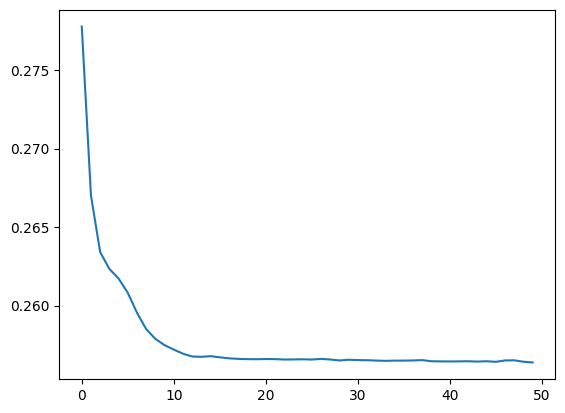

In [ ]:
model.compile(optimizer=Adam(learning_rate=0.01), loss='mean_squared_error')
history = model.fit(x_data, y_data,epochs=50,verbose=0)
y_pred = model.predict(x_data)
plt.plot(history.history["loss"])

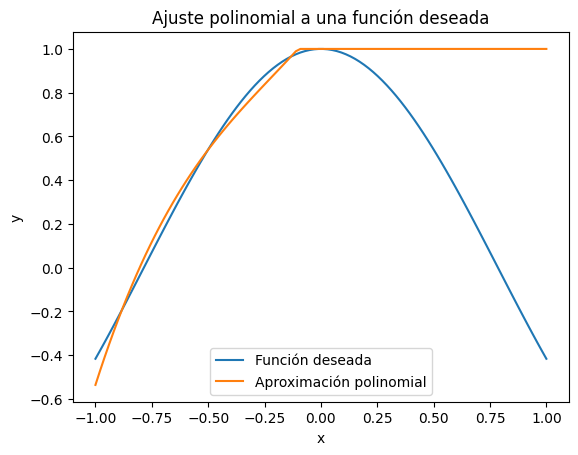

a: 1.1200418
b: 1.2457919
c: 0.7488003
d: 1.158761


In [ ]:
plt.plot(x_data, y_data, label="Función deseada")
plt.plot(x_data, y_pred, label="Aproximación polinomial")
plt.legend()
plt.title("Ajuste polinomial a una función deseada")
plt.xlabel("x")
plt.ylabel("y")
plt.show()

# Obtén los valores de los coeficientes
a, b, c, d = model.get_weights()
print("a:", a)
print("b:", b)
print("c:", c)
print("d:", d)